**Assignment 2**  
Matt Caraher

In [46]:
import random
import numpy as np
import tensorflow as tf
import python_splitter as ps
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [30]:
# Setting seeds
seed_val = 16
random.seed(seed_val)
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

In [38]:
# Creating a train and test directory
base_dir = r'C:\Users\mattr\Downloads\Zoo Classifier project - images\images'
classes = ['cats','dogs','panda']

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)

train_ratio = 0.8

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok = True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok = True)
    
    all_images = os.listdir(os.path.join(base_dir, cls))
    
    np.random.shuffle(all_images)
    
    split_idx = int(train_ratio * len(all_images))
    train_images = all_images[:split_idx]
    test_images = all_images[split_idx:]
    
    for image in train_images:
        shutil.copy(os.path.join(base_dir, cls, image), os.path.join(train_dir, cls, image))
    for image in test_images:
        shutil.copy(os.path.join(base_dir, cls, image), os.path.join(test_dir, cls, image))

In [40]:
# Set up image data generators for train and test
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator()

img_size = 150

train_generator = datagen.flow_from_directory(
    r'C:\Users\mattr\Downloads\Zoo Classifier project - images\images\train',
    target_size=(img_size,img_size),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\mattr\Downloads\Zoo Classifier project - images\images\test',
    target_size=(img_size,img_size),
    batch_size=32,
    class_mode='categorical'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Preprocessing and exploration of data


Number of training images: 2400
Number of testing images: 600


Classes: {'cats': 0, 'dogs': 1, 'panda': 2}




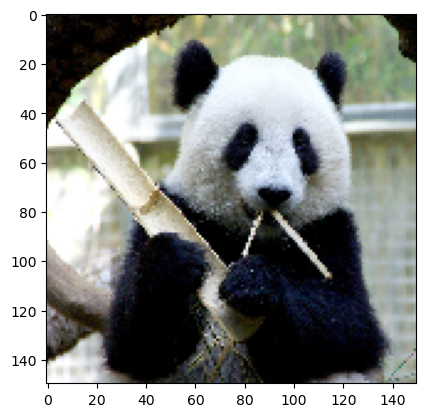

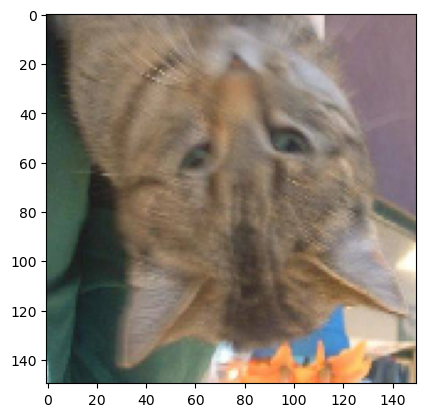

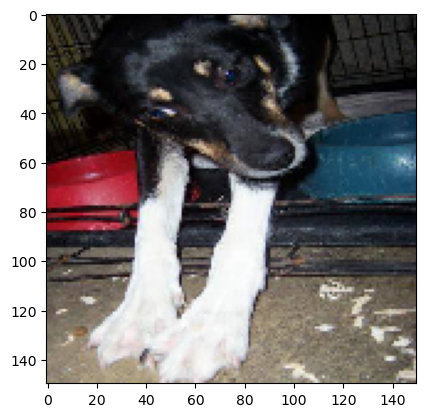

In [41]:
print('Preprocessing and exploration of data')
print('\n')
print('Number of training images:', train_generator.samples)
print('Number of testing images:', test_generator.samples)
print('\n')

classes = train_generator.class_indices

print('Classes:', classes)
print('\n')

images, labels = next(train_generator)

for i in range(3):
    plt.imshow(images[i].astype(np.uint8))
    plt.show()

In [54]:
# Base model creation
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 6s 80ms/step - loss: 197.4798 - acc: 0.5013
Epoch 2/15
75/75 [==============================] - 6s 82ms/step - loss: 3.4706 - acc: 0.6054
Epoch 3/15
75/75 [==============================] - 6s 83ms/step - loss: 1.9821 - acc: 0.6408
Epoch 4/15
75/75 [==============================] - 6s 82ms/step - loss: 1.3384 - acc: 0.6888
Epoch 5/15
75/75 [==============================] - 6s 85ms/step - loss: 0.9493 - acc: 0.7400
Epoch 6/15
75/75 [==============================] - 6s 81ms/step - loss: 0.8136 - acc: 0.7738
Epoch 7/15
75/75 [==============================] - 6s 80ms/step - loss: 0.6114 - acc: 0.8129
Epoch 8/15
75/75 [==============================] - 6s 81ms/step - loss: 0.5439 - acc: 0.8467
Epoch 9/15
75/75 [==============================] - 6s 81ms/step - loss: 0.5165 - acc: 0.8504
Epoch 10/15
75/75 [==============================] - 6s 81ms/step - loss: 0.4593 - acc: 0.8754
Epoch 11/15
75/75 [==============================] - 6s 8

In [55]:
# Variation of base model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 9s 116ms/step - loss: 539.2278 - acc: 0.4663
Epoch 2/15
75/75 [==============================] - 9s 118ms/step - loss: 3.6622 - acc: 0.6112
Epoch 3/15
75/75 [==============================] - 9s 121ms/step - loss: 2.0022 - acc: 0.6608
Epoch 4/15
75/75 [==============================] - 9s 123ms/step - loss: 1.4267 - acc: 0.7058
Epoch 5/15
75/75 [==============================] - 9s 122ms/step - loss: 1.0188 - acc: 0.7617
Epoch 6/15
75/75 [==============================] - 10s 129ms/step - loss: 0.8541 - acc: 0.7942
Epoch 7/15
75/75 [==============================] - 9s 121ms/step - loss: 0.7772 - acc: 0.8213
Epoch 8/15
75/75 [==============================] - 9s 119ms/step - loss: 0.6359 - acc: 0.8504
Epoch 9/15
75/75 [==============================] - 9s 121ms/step - loss: 0.5522 - acc: 0.8675
Epoch 10/15
75/75 [==============================] - 9s 124ms/step - loss: 0.4116 - acc: 0.8842
Epoch 11/15
75/75 [===========================

In [56]:
# Variation of base model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 6s 70ms/step - loss: 201.2315 - acc: 0.4967
Epoch 2/15
75/75 [==============================] - 5s 69ms/step - loss: 9.7514 - acc: 0.6133
Epoch 3/15
75/75 [==============================] - 5s 69ms/step - loss: 4.4166 - acc: 0.6625
Epoch 4/15
75/75 [==============================] - 5s 69ms/step - loss: 2.7955 - acc: 0.6971
Epoch 5/15
75/75 [==============================] - 5s 69ms/step - loss: 2.1061 - acc: 0.7212
Epoch 6/15
75/75 [==============================] - 5s 69ms/step - loss: 1.8217 - acc: 0.7492
Epoch 7/15
75/75 [==============================] - 5s 71ms/step - loss: 1.4118 - acc: 0.7758
Epoch 8/15
75/75 [==============================] - 5s 68ms/step - loss: 0.9456 - acc: 0.8121
Epoch 9/15
75/75 [==============================] - 5s 66ms/step - loss: 0.8974 - acc: 0.8179
Epoch 10/15
75/75 [==============================] - 5s 67ms/step - loss: 0.6041 - acc: 0.8500
Epoch 11/15
75/75 [==============================] - 5s 6

In [57]:
# Variation of base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 7s 86ms/step - loss: 348.5207 - acc: 0.4837
Epoch 2/15
75/75 [==============================] - 6s 83ms/step - loss: 4.8173 - acc: 0.6200
Epoch 3/15
75/75 [==============================] - 6s 85ms/step - loss: 2.4674 - acc: 0.6833
Epoch 4/15
75/75 [==============================] - 6s 85ms/step - loss: 1.4280 - acc: 0.7317
Epoch 5/15
75/75 [==============================] - 6s 84ms/step - loss: 1.2565 - acc: 0.7621
Epoch 6/15
75/75 [==============================] - 6s 83ms/step - loss: 0.9835 - acc: 0.7896
Epoch 7/15
75/75 [==============================] - 6s 82ms/step - loss: 0.7402 - acc: 0.8238
Epoch 8/15
75/75 [==============================] - 6s 85ms/step - loss: 0.5647 - acc: 0.8500
Epoch 9/15
75/75 [==============================] - 6s 82ms/step - loss: 0.5333 - acc: 0.8637
Epoch 10/15
75/75 [==============================] - 6s 80ms/step - loss: 0.4935 - acc: 0.8813
Epoch 11/15
75/75 [==============================] - 6s 8

In [58]:
# Variation of base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 6s 81ms/step - loss: 62.9252 - acc: 0.4833
Epoch 2/15
75/75 [==============================] - 6s 83ms/step - loss: 18.2856 - acc: 0.5458
Epoch 3/15
75/75 [==============================] - 6s 82ms/step - loss: 17.4390 - acc: 0.5742
Epoch 4/15
75/75 [==============================] - 6s 83ms/step - loss: 12.1603 - acc: 0.6192
Epoch 5/15
75/75 [==============================] - 7s 87ms/step - loss: 7.6853 - acc: 0.6604
Epoch 6/15
75/75 [==============================] - 6s 84ms/step - loss: 6.8471 - acc: 0.6750
Epoch 7/15
75/75 [==============================] - 6s 83ms/step - loss: 8.4098 - acc: 0.6671
Epoch 8/15
75/75 [==============================] - 6s 84ms/step - loss: 3.7767 - acc: 0.7287
Epoch 9/15
75/75 [==============================] - 6s 84ms/step - loss: 3.3738 - acc: 0.7487
Epoch 10/15
75/75 [==============================] - 6s 84ms/step - loss: 1.8388 - acc: 0.8079
Epoch 11/15
75/75 [==============================] - 6s

In [60]:
# Variation of base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 7s 83ms/step - loss: 750.3684 - acc: 0.4875
Epoch 2/15
75/75 [==============================] - 6s 81ms/step - loss: 0.9516 - acc: 0.5138
Epoch 3/15
75/75 [==============================] - 6s 81ms/step - loss: 0.8907 - acc: 0.5333
Epoch 4/15
75/75 [==============================] - 6s 82ms/step - loss: 0.8839 - acc: 0.5383
Epoch 5/15
75/75 [==============================] - 6s 82ms/step - loss: 0.8115 - acc: 0.5567
Epoch 6/15
75/75 [==============================] - 6s 81ms/step - loss: 0.8800 - acc: 0.5562
Epoch 7/15
75/75 [==============================] - 6s 82ms/step - loss: 0.7683 - acc: 0.5858
Epoch 8/15
75/75 [==============================] - 6s 85ms/step - loss: 0.7695 - acc: 0.5767
Epoch 9/15
75/75 [==============================] - 6s 82ms/step - loss: 0.7790 - acc: 0.6029
Epoch 10/15
75/75 [==============================] - 6s 83ms/step - loss: 0.7246 - acc: 0.6033
Epoch 11/15
75/75 [==============================] - 6s 8

In [61]:
# Variation of base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSProp', metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 15
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/15
75/75 [==============================] - 7s 87ms/step - loss: 665.8964 - acc: 0.4858
Epoch 2/15
75/75 [==============================] - 7s 89ms/step - loss: 6.6754 - acc: 0.5879
Epoch 3/15
75/75 [==============================] - 7s 90ms/step - loss: 1.4891 - acc: 0.6329
Epoch 4/15
75/75 [==============================] - 7s 86ms/step - loss: 0.9483 - acc: 0.6621
Epoch 5/15
75/75 [==============================] - 7s 92ms/step - loss: 0.7988 - acc: 0.6958
Epoch 6/15
75/75 [==============================] - 7s 89ms/step - loss: 0.7218 - acc: 0.7267
Epoch 7/15
75/75 [==============================] - 6s 84ms/step - loss: 0.6616 - acc: 0.7683
Epoch 8/15
75/75 [==============================] - 6s 83ms/step - loss: 0.6605 - acc: 0.7792
Epoch 9/15
75/75 [==============================] - 6s 83ms/step - loss: 0.5386 - acc: 0.7958
Epoch 10/15
75/75 [==============================] - 6s 83ms/step - loss: 0.5234 - acc: 0.8208
Epoch 11/15
75/75 [==============================] - 6s 8

In [62]:
# Variation of base model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 20
)

loss, acc = model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

print("Loss:", loss)
print("Accuracy:", acc)

Epoch 1/20
75/75 [==============================] - 7s 84ms/step - loss: 337.5023 - acc: 0.5146
Epoch 2/20
75/75 [==============================] - 6s 83ms/step - loss: 4.2517 - acc: 0.6067
Epoch 3/20
75/75 [==============================] - 6s 84ms/step - loss: 2.4378 - acc: 0.6433
Epoch 4/20
75/75 [==============================] - 6s 83ms/step - loss: 1.4711 - acc: 0.7054
Epoch 5/20
75/75 [==============================] - 6s 83ms/step - loss: 1.0549 - acc: 0.7471
Epoch 6/20
75/75 [==============================] - 6s 85ms/step - loss: 0.7581 - acc: 0.7921
Epoch 7/20
75/75 [==============================] - 6s 83ms/step - loss: 0.7930 - acc: 0.8067
Epoch 8/20
75/75 [==============================] - 6s 83ms/step - loss: 0.6175 - acc: 0.8442
Epoch 9/20
75/75 [==============================] - 6s 83ms/step - loss: 0.4937 - acc: 0.8529
Epoch 10/20
75/75 [==============================] - 6s 84ms/step - loss: 0.4846 - acc: 0.8679
Epoch 11/20
75/75 [==============================] - 6s 8

Based on the loss and accuracy of each model tried, the optimal model of the bunch could be the one with a changed learning rate of 0.001, the 4th model. With a loss of 3.5 and accuracy of 60%, it is an improvement over the base model without too much added loss, relative to the other variations tried.